The following code is the work of two group members for Part 1 of assignment 5.

chi-square=  62.69052554954325
reduced chi-square=  2.50762102198173


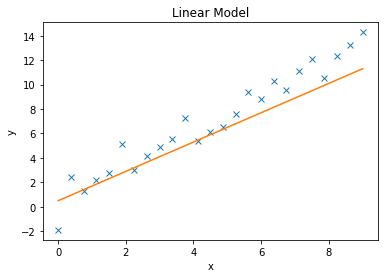

In [3]:
# This code plots observed data points along with using the linearity of parameters to find a line best fit,
    # and also calculate chi-square and reduced chi-squared

# Imports the libraries used in this code 
import matplotlib.pylab as plt
import math
import numpy as np

# Reads a 2 column file and separates them into an x and y list
def read_file(file):
    with open(file, 'r') as data:
        x = []
        y = []
        for line in data:
            l = line.split()
            x.append(float(l[0]))
            y.append(float(l[1]))

    return x, y

x, y = read_file('data_points_assign5.txt')


# Initializes the constant used
n= len(x)

# Defines the linear model function; for the input of slope and intercept, return $y=mx+b$
def linear_model (x, param):
    slope, intercept = param
    #result = slope*x + intercept
    result = [i*slope+intercept for i in x]  #list comprehension: for every element i in x, apply "i*slope +intercept" 
    return result

# Set parameters and call the linear model to variable y_model
slope0, intercept0 = 1.2, 0.5
y_model = linear_model(x, (slope0, intercept0))


# Calculates chi-square using equation 10
def chi_x (expected, observed, uncertainty=1):
    sum_list = []
    for i in range (n):
        xsum = ((expected[i]-observed[i])/uncertainty)**2
        sum_list.append(xsum)
    chi= sum(sum_list)
    return chi

chi_square = chi_x(y_model,y)

# Calculates reduced chi-squared using equation 9
redd_chi = chi_square/n


# Prints the values for chi-square and reduced chi-square
print ("chi-square= ", chi_square)
print ("reduced chi-square= ", redd_chi)



# Plots the linear model as a full line together with the data points
plt.plot(x, y, "x")
plt.plot(x, y_model)
plt.title("Linear Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



Figure 1.1: The linear model of data points and a plot of y in relation to x. The obtained data points taken from a file (blue crosses) and line of best fit found using the linearity of parameters method (orange).

1d) From Figure 1.1, it can be seen that the line of best fit using the linearity of parameters method is not bad as a line of best fit, however it could be better. This is due to the fact that the line of best fit should almost slice through the average of the given data points. Yet in the linearity of parameters method fit, from the domain values of 4 to 8, the y values are slightly too low from the average of the respective data points. 

In this part of the code the values of chi-square was calculated to be 62.7 and reduced chi-square was calculated to be 2.51. Then since the reduced chi-square value is in the order of the the uncertainty 1, then this linear model could be considered as a "good" model. However, like mentioned in the above paragraph, the model could be improved.

Intercept = 0.36
Slope =  1.47
reduced chi-squared value =  0.8647975457609353


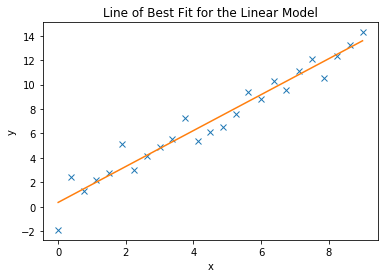

In [3]:
# Part e)
intercept_sequence = np.linspace(0.0, 3.0, 101)
slope_sequence = np.linspace(0.0, 3.0, 101)

# Initalizes the rchi2 array
rchi2 = np.zeros(shape=(101, 101))

# Calculate all the reduced chi squared values and put them in the rchi2 array
for indx, intercept in enumerate(intercept_sequence):  # this loop scans your vector of intercept values and gets also the index of each component of the vector as 'indx'
    for jndx, slope in enumerate(slope_sequence): # this loop scans your vector of slope values and get also the index of each component of the vector as 'jndx'
        y_model = linear_model( x, (slope, intercept) )  # I am calculating the value for the linear model inside these loops to use in my chi2 function that I named chi_squared_reduced.
        chi_square = chi_x(y_model, y)/n
        rchi2[indx,jndx] = chi_square  # I give these objects to the function and for each value of intercept and slope a value of X^2/N is stored in my 2D array chi2.

# Part f)
# Computes the minimum reduced chi-squared value and the optimal slope and intercept
wmin = np.argmin(rchi2)
(b0, m0) = np.unravel_index(wmin, rchi2.shape)
print("Intercept =", intercept_sequence[b0])
print("Slope = ", slope_sequence[m0])
print("reduced chi-squared value = ", rchi2[b0,m0])
y_model = linear_model( x, (slope_sequence[m0], intercept_sequence[b0]) )

# Plots the linear model as a full line together with the data points
plt.plot(x, y, "x")
plt.plot(x, y_model)
plt.title("Line of Best Fit for the Linear Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Figure 1.2: Graph of the Line of Best Fit for the Linear Model where the slope is 1.47 with an intercept of 0.36.

We can see when comparing Figure 1.1 with Figure 1.2 that the above code has improved the best fit outcome. This was done by adjusting our inital parameters which ultimatley gives more accurate data and a better Line of Best Fit. 

In the above code, we obtained a value of 0.8647975457609353 for the Reduced Chi-squared value. In part (d) we have a value of 2.50762102198173 for the Reduced Chi-squared value, as we can see our new value is significantly smaller then the one found prior. This is due to the new perameters we used in the above code block.

The slope of this minimum is at 1.47, whereas the intercept is at 0.36. In part (b) we were given an initial estimation of the slope at 1.2 and the intercept at 0.5. By comparing these values we see that our computed slope is a higher value whereas our intercept is a smaller number. With a higher slope and lower intercept, as we can see in Figure 1.2 the line of best fit is more of an accurate representaiton of the data then the line of best fit form Figure 1.1.

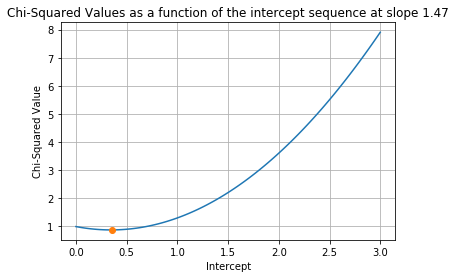

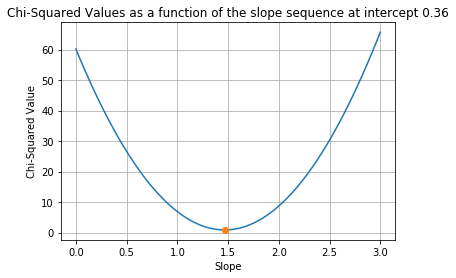

In [44]:
# Part g)

# Slices the chi squared values out of the rchi2 array along the row b0
chi_squared_values_fixed_intercept = rchi2[b0,:]
# Slices the chi squared values out of the rchi2 array along the column m0
chi_squared_values_fixed_slope = rchi2[:,m0]

# Computes the minimum value in both lists 
slope_min = np.argmin(chi_squared_values_fixed_intercept)
intercept_min = np.argmin(chi_squared_values_2_fixed_slope)

# Plots the chi-squared values while fixing the slope at 1.47 as a function of the intercept sequence
plt.plot(intercept_sequence, chi_squared_values_2_fixed_slope)
plt.grid()
plt.title("Chi-Squared Values as a function of the intercept sequence at slope 1.47")
plt.xlabel("Intercept")
plt.ylabel("Chi-Squared Value")
plt.plot(0.36, chi_squared_values_fixed_intercept[slope_min], "o") # Plots the minimum value at intercept = 0.36
plt.show()

# Plots the chi-squared values while fixing the intercept at 0.36 as a function of the slope sequence
plt.plot(slope_sequence, chi_squared_values_fixed_intercept)
plt.grid()
plt.title("Chi-Squared Values as a function of the slope sequence at intercept 0.36")
plt.xlabel("Slope")
plt.ylabel("Chi-Squared Value")
plt.plot(1.47, chi_squared_values_fixed_slope[intercept_min], "o") # Plots the minimum value at intercept = 0.36
plt.show()


(Top) Figure 1.3: The graph of Chi-squared values as a function of Interecept values, the orange dot shows the point where the slope is fixed at 1.47, which is the minimum of the Reduced Chi-squared.

(Bottom) Figure 1.4: The graph of Chi-squared Values as a function of slope values, the orange dot shows the point where the intercept is fixed at 0.36, which is the minimum of the Reduced Chi-squared.

In both Figure 1.3 and Figure 1.4 we see the minimum of the graphs to be 1.47 for the slope and 0.37 of the intercept, this is what we expected when caluclating where our minimum of the Reduced Chi-squared is, as seen in the above codes. 


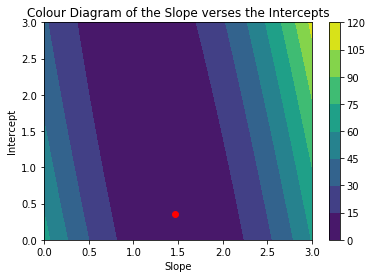

In [48]:
# Part h)
xx, yy = np.meshgrid(slope_sequence, intercept_sequence)

# Plots a countour map of chi squared values as a function of the slope and y-intercept 
plt.title("Colour Diagram of the Slope verses the Intercepts")
plt.contourf(xx, yy, rchi2)
plt.plot(1.47, 0.36, "ro") # Plots the position of the minimum chi-squared value (1.47, 0.36)
plt.xlabel("Slope")
plt.ylabel("Intercept")

# Set Colorbar to show the values of the electric potential 
plt.colorbar()

# Show the result in the plot window
plt.show()

Figre 1.5: Graph of slopes versus intercepts with coloured contour lines representing the size of the Reduced Chi-squared. The minimum of the Reduced Chi-squared is presented on the graph with a red dot. 